# Spam Classification from Email

In [1]:
#import library
import pickle 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics

# Data Extraction

In [2]:
df = pd.read_csv('Spam.csv')

In [3]:
df.shape

(4601, 58)

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
#check correlation of each variable
df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


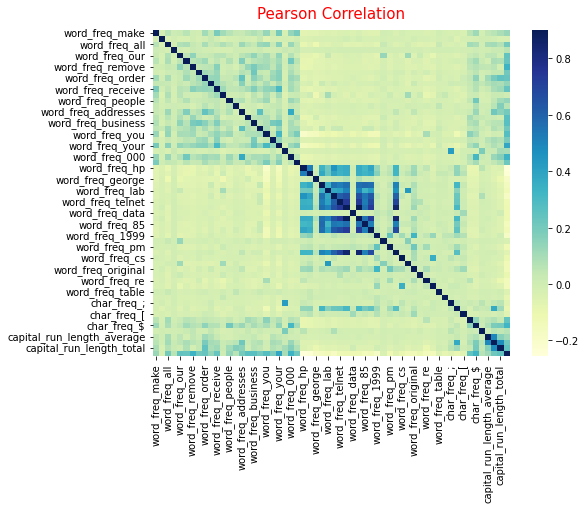

In [8]:
#visualize correlation of variable using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), vmax = 0.9, cmap = 'YlGnBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12, color = 'r')
plt.show()

In [9]:
#transform spam column to categorical data
df.spam[df['spam'] == 0] = 'ham'
df.spam[df['spam'] == 1] = 'spam'
df.head()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_11148/559604964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.spam[df['spam'] == 0] = 'ham'


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


# Exploratory Data Analysis (EDA)

In [10]:
#analyze of spam status based on capital run length average
pd.pivot_table(df, index = 'spam', values = 'capital_run_length_average', 
               aggfunc = {'capital_run_length_average' : np.mean}).sort_values('capital_run_length_average', ascending = False)

,capital_run_length_average
spam,
spam,9.519165
ham,2.377301


In [11]:
#analyze of spam status based on count of capital run length longest
pd.pivot_table(df, index = 'spam', values = 'capital_run_length_longest',
              aggfunc = {'capital_run_length_longest' : np.sum}).sort_values('capital_run_length_longest', ascending = False)

,capital_run_length_longest
spam,
spam,189265
ham,50782


In [12]:
#anayze of spam status based on count of capital run length total
pd.pivot_table(df, index = 'spam', values = 'capital_run_length_total',
              aggfunc = {'capital_run_length_total' : np.sum}).sort_values('capital_run_length_total', ascending = False)

,capital_run_length_total
spam,
spam,853233
ham,450181


In [13]:
#anayze of spam status based on capital run length average, capital run length longest and capital run length total
pd.pivot_table(df, index = 'spam', values = ['capital_run_length_average', 'capital_run_length_longest', 
                                             'capital_run_length_total'], 
               aggfunc = {'capital_run_length_average' : np.mean, 'capital_run_length_longest' : np.sum, 
                          'capital_run_length_total' : np.sum}).sort_values(['capital_run_length_average', 
                                                                             'capital_run_length_longest', 
                                                                             'capital_run_length_total'], ascending = False)

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,
spam,9.519165,189265,853233
ham,2.377301,50782,450181


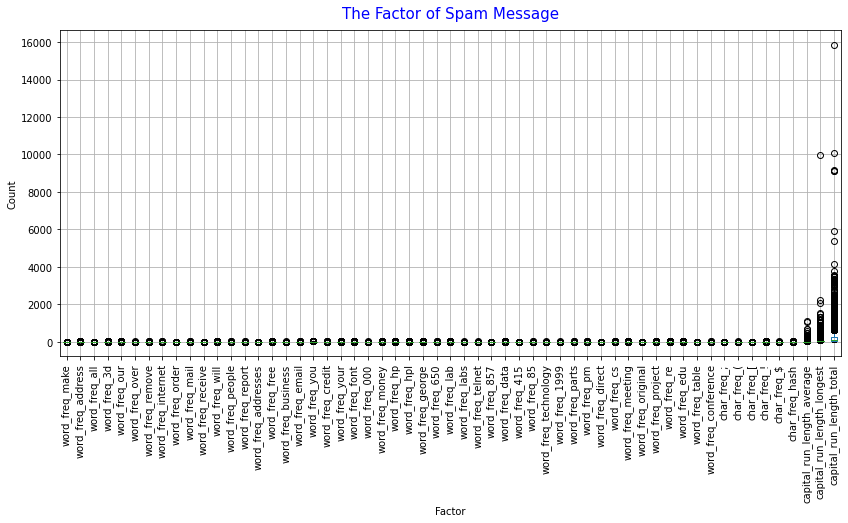

In [14]:
#visualize the factor of spam message based on capital run length average, capital run length longest and capital run length total
plt.figure(figsize = (14,6))
chart = df.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Spam Message', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Factor')
plt.ylabel('Count')
plt.show()

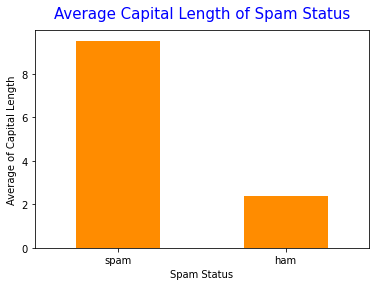

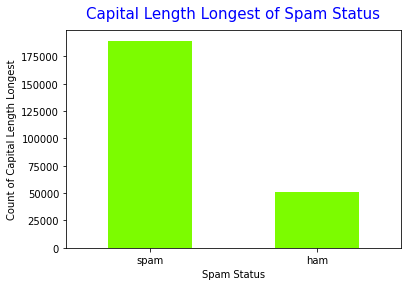

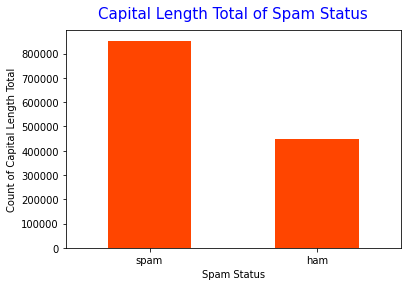

In [15]:
#visualize of spam status based on capital run length average
chart = df.groupby('spam')['capital_run_length_average'].mean().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                    color = 'darkorange')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Average Capital Length of Spam Status', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Spam Status')
plt.ylabel('Average of Capital Length')
plt.show()

#visualize of spam status based on capital run length longest
chart = df.groupby('spam')['capital_run_length_longest'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                    color = 'lawngreen')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Capital Length Longest of Spam Status', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Spam Status')
plt.ylabel('Count of Capital Length Longest')
plt.show()

#visualize of spam status based on capital run length total
chart = df.groupby('spam')['capital_run_length_total'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                    color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Capital Length Total of Spam Status', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Spam Status')
plt.ylabel('Count of Capital Length Total')
plt.show()

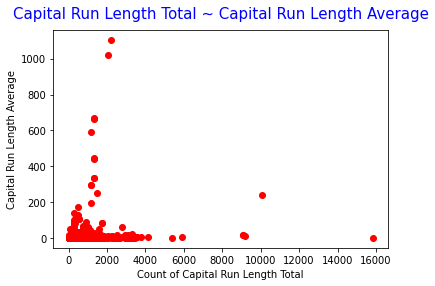

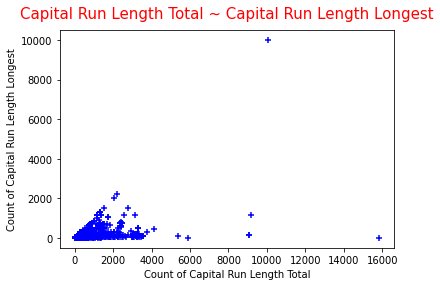

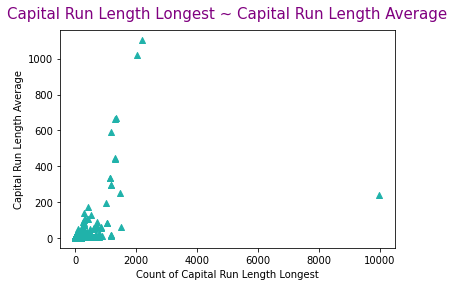

In [16]:
#visualize correlation of capital run length total and capital run length average
plt.scatter(df['capital_run_length_total'], df['capital_run_length_average'], marker = 'o', color = 'r')
plt.title('Capital Run Length Total ~ Capital Run Length Average', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Count of Capital Run Length Total')
plt.ylabel('Capital Run Length Average')
plt.show()

#visualize correlation of capital run length total and capital run length longest
plt.scatter(df['capital_run_length_total'], df['capital_run_length_longest'], marker = '+', color = 'b')
plt.title('Capital Run Length Total ~ Capital Run Length Longest', fontsize = 15, pad = 12, color = 'r')
plt.xlabel('Count of Capital Run Length Total')
plt.ylabel('Count of Capital Run Length Longest')
plt.show()

#visualize correlation of capital run length longest and capital run length average
plt.scatter(df['capital_run_length_longest'], df['capital_run_length_average'], marker = '^', color = 'lightseagreen')
plt.title('Capital Run Length Longest ~ Capital Run Length Average', fontsize = 15, pad = 12, color = 'purple')
plt.xlabel('Count of Capital Run Length Longest')
plt.ylabel('Capital Run Length Average')
plt.show()

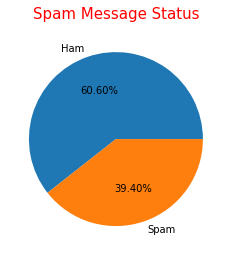

In [17]:
#visualize spam status
spam = [np.count_nonzero(df['spam'] == 'ham'),
       np.count_nonzero(df['spam'] == 'spam')]
activities = ['Ham', 'Spam']
plt.pie(spam, labels = activities, autopct = '%1.2f%%')
plt.title('Spam Message Status', fontsize = 15, pad = 12, color = 'r')
plt.show()

In [18]:
#handling categorical data
df['spam'] = df['spam'].astype('category').cat.codes

#splitting data
X = df.drop('spam', axis = 1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3220, 57)
(3220,)
(1381, 57)
(1381,)


# Gaussian Naive Bayes

In [19]:
#build model
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)
print('Accuracy Score :', gnb.score(X_test, y_test))

Wall time: 8 ms
Accuracy Score : 0.8247646632874729


In [20]:
#calculate prediction probability
prob_train = np.squeeze(gnb.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(gnb.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
 6.17455061e-28 1.00000000e+00]

Probability of Testing Set : 
 [1.00000000e+00 5.33622534e-07 6.66529549e-13 ... 9.99999774e-01
 1.00000000e+00 2.76015674e-54]


In [21]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.948221414590824
Training of Area Under the Curve (AUC) : 0.9453477741022027


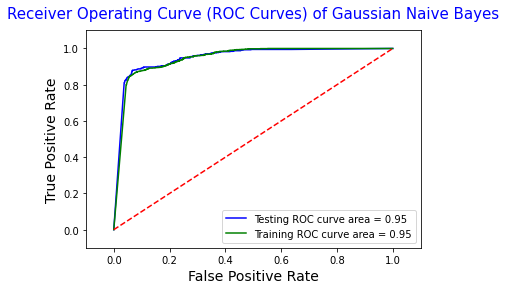

In [22]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Gaussian Naive Bayes', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [23]:
#prediction
y_pred = gnb.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 0]


      Spam  Ham
Spam   592  212
Ham     30  547


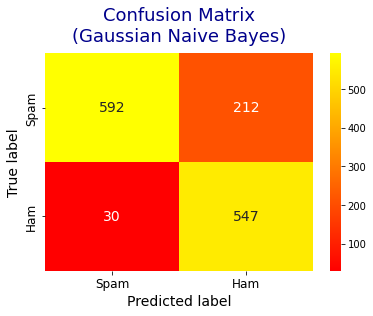

In [24]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'autumn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Gaussian Naive Bayes)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [25]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Gaussian Naive Bayes : \n')
print(report)

Classification Report of Gaussian Naive Bayes : 

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       804
           1       0.72      0.95      0.82       577

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.83      1381



# Random Forest

In [26]:
#build model
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
print('Accuracy Score : ', rf.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 443 ms
Accuracy Score :  0.9558291093410572


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [27]:
#calculate prediction probability
prob_train = np.squeeze(rf.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(rf.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.93 0.98 0.99 ... 0.02 0.   0.99]

Probability of Testing Set : 
 [0.   0.27 0.07 ... 0.97 0.59 0.04]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [28]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.987958819421092
Training of Area Under the Curve (AUC) : 0.9999997961034555


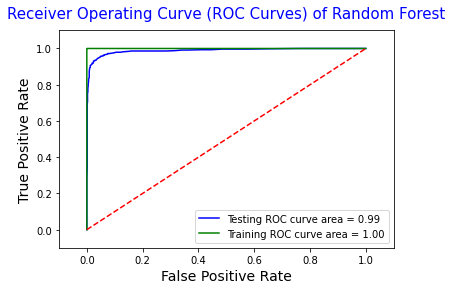

In [29]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Random Forest', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [30]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Spam  Ham
Spam   782   22
Ham     39  538


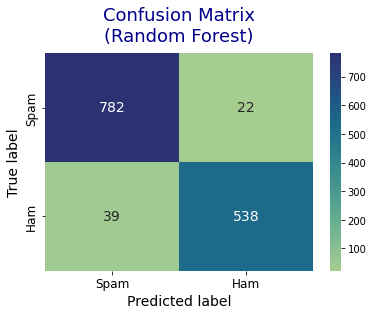

In [31]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'crest')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Random Forest)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [32]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Random Forest : \n')
print(report)

Classification Report of Random Forest : 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       804
           1       0.96      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381



In [33]:
#check feature importance
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

char_freq_$                   0.121871
char_freq_!                   0.098356
word_freq_remove              0.084867
capital_run_length_average    0.074536
word_freq_free                0.058150
capital_run_length_longest    0.056054
word_freq_your                0.053591
word_freq_hp                  0.041510
capital_run_length_total      0.041472
word_freq_you                 0.035241
word_freq_money               0.034265
word_freq_our                 0.028039
word_freq_000                 0.023654
word_freq_george              0.019955
word_freq_edu                 0.014756
word_freq_internet            0.014565
word_freq_hpl                 0.014492
word_freq_business            0.013572
char_freq_(                   0.011833
word_freq_will                0.011317
word_freq_1999                0.011164
word_freq_receive             0.010621
word_freq_re                  0.010282
word_freq_all                 0.009747
word_freq_email               0.009452
word_freq_over           

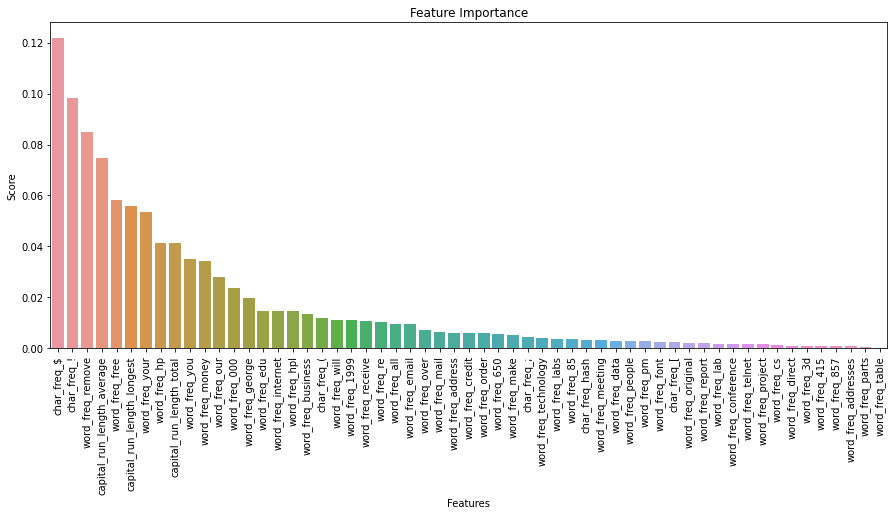

In [34]:
#visualize feature
plt.figure(figsize = (15,6))
chart = sns.barplot(x = feature.index, y = feature)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Adaptive Boosting

In [35]:
#build model
abc = AdaBoostClassifier()
%time abc.fit(X_train, y_train)
print('Accuracy Score :', abc.score(X_test, y_test))

Wall time: 261 ms
Accuracy Score : 0.9333816075307748


In [36]:
#calculate prediction probability
prob_train = np.squeeze(abc.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(abc.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.50889927 0.50658386 0.52653197 ... 0.47814009 0.46313211 0.53191395]

Probability of Testing Set : 
 [0.4843128  0.48222512 0.46779645 ... 0.52348243 0.50484449 0.46498289]


In [37]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.9786045940143303
Training of Area Under the Curve (AUC) : 0.9893718926166614


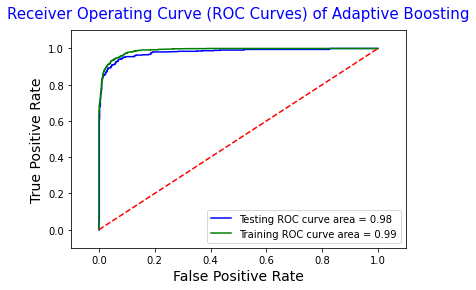

In [38]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Adaptive Boosting', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [39]:
#prediction
y_pred = abc.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


      Spam  Ham
Spam   767   37
Ham     55  522


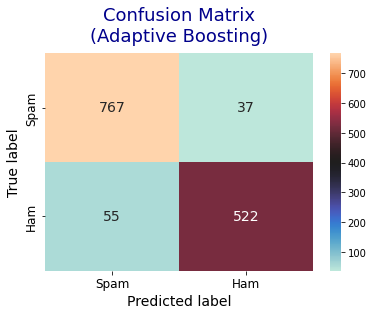

In [40]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'icefire')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Adaptive Boosting)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [41]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Adaptive Boosting : \n')
print(report)

Classification Report of Adaptive Boosting : 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       804
           1       0.93      0.90      0.92       577

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



# K-Nearest Neighbors

In [42]:
#setup arrays to store training and test accuracy
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

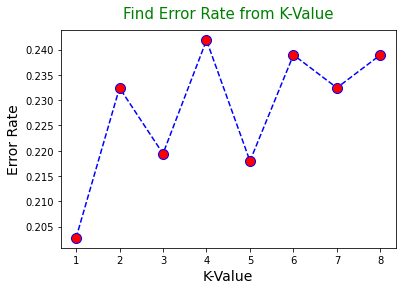

In [43]:
#find good K-value from error rate
error_rate = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.plot(range(1,9), error_rate, color = 'blue',
                linestyle = 'dashed', marker = 'o',
                markerfacecolor = 'red', markersize = 10)

plt.title('Find Error Rate from K-Value', fontsize = 15, pad = 12, color = 'g')
plt.xlabel('K-Value', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

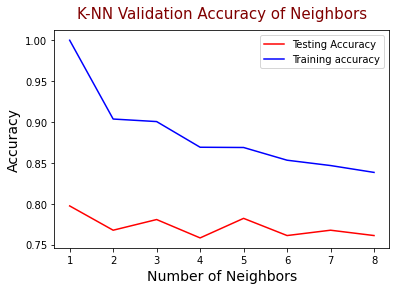

In [44]:
#visualize knn model for training and testing
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color = 'r')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy', color = 'b')
plt.title('K-NN Validation Accuracy of Neighbors', fontsize = 15, pad = 12, color = 'maroon')
plt.legend()
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.show()

In [45]:
#build model
knn = KNeighborsClassifier(n_neighbors = 5)
%time knn.fit(X_train, y_train)
print('Accuracy Score :', knn.score(X_test, y_test))

Wall time: 0 ns
Accuracy Score : 0.782041998551774


c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
#calculate prediction probability
prob_train = np.squeeze(knn.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(knn.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.2 1.  1.  ... 0.  0.2 0.6]

Probability of Testing Set : 
 [0.  0.4 0.  ... 1.  0.2 0. ]


In [47]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.8433072936875414
Training of Area Under the Curve (AUC) : 0.9446663518504019


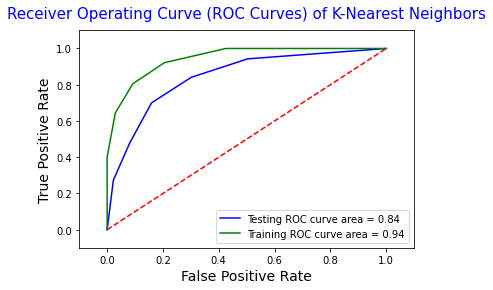

In [48]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of K-Nearest Neighbors', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [49]:
#prediction
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


      Spam  Ham
Spam   676  128
Ham    173  404


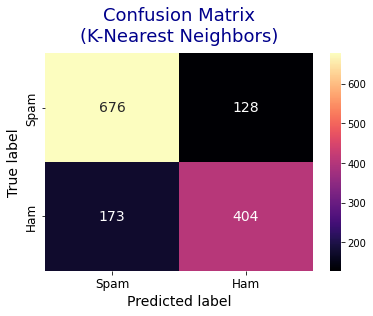

In [50]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(K-Nearest Neighbors)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [51]:
#classification report 
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of K-Nearest Neighbors : \n')
print(report)

Classification Report of K-Nearest Neighbors : 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       804
           1       0.76      0.70      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381



# Linear Support Vector Machine 

In [52]:
#build model
lsvm = LinearSVC()
%time lsvm.fit(X_train, y_train)
print('Accuracy Score :', lsvm.score(X_test, y_test))

Wall time: 161 ms
Accuracy Score : 0.8066618392469225


c:\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
#calculate prediction probability
prob_train = np.squeeze(lsvm._predict_proba_lr(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(lsvm._predict_proba_lr(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.77770611 0.49837256 0.99862747 ... 0.07453891 0.58341596 0.95975977]

Probability of Testing Set : 
 [0.29119281 0.30987734 0.45785095 ... 0.96988374 0.60844776 0.37082557]


In [54]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.8817761280253844
Training of Area Under the Curve (AUC) : 0.8928800957824407


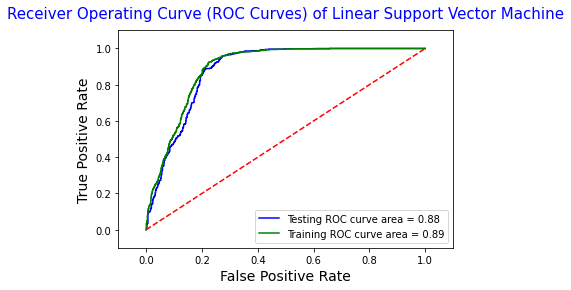

In [55]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Linear Support Vector Machine', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [56]:
#prediction
y_pred = lsvm.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


      Spam  Ham
Spam   555  249
Ham     18  559


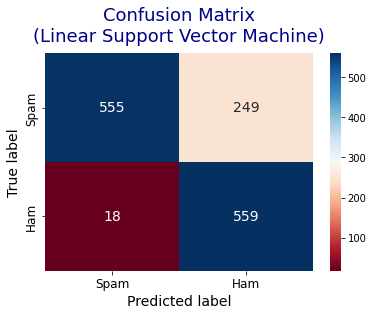

In [57]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'RdBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Linear Support Vector Machine)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [58]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Linear Support Vector Machine : \n')
print(report)

Classification Report of Linear Support Vector Machine : 

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       804
           1       0.69      0.97      0.81       577

    accuracy                           0.81      1381
   macro avg       0.83      0.83      0.81      1381
weighted avg       0.85      0.81      0.81      1381



# Decision Tree

In [59]:
#build model
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
%time dtc.fit(X_train, y_train)
print('Accuracy Score :', dtc.score(X_test, y_test))

Wall time: 16 ms
Accuracy Score : 0.8616944243301955


In [60]:
#calculate prediction probability
prob_train = np.squeeze(dtc.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(dtc.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.96517413 0.93716578 0.93716578 ... 0.08112583 0.08112583 0.93716578]

Probability of Testing Set : 
 [0.08112583 0.08112583 0.08112583 ... 0.08112583 0.49473684 0.08112583]


In [61]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.905047983651931
Training of Area Under the Curve (AUC) : 0.9140631116896335


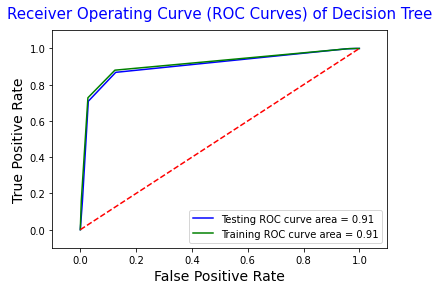

In [62]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Decision Tree', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [63]:
#prediction 
y_pred = dtc.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


      Spam  Ham
Spam   781   23
Ham    168  409


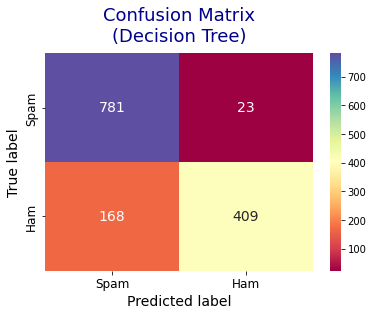

In [64]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Decision Tree)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [65]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Decision Tree : \n')
print(report)

Classification Report of Decision Tree : 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       804
           1       0.95      0.71      0.81       577

    accuracy                           0.86      1381
   macro avg       0.88      0.84      0.85      1381
weighted avg       0.87      0.86      0.86      1381



# Linear Discriminant Analysis

In [66]:
#build model
lda = LinearDiscriminantAnalysis()
%time lda.fit(X_train, y_train)
print('Accuracy Score :', lda.score(X_test, y_test))

Wall time: 50.6 ms
Accuracy Score : 0.8863142650253439


In [67]:
#calculate prediction probability
prob_train = np.squeeze(lda.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(lda.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.79059668 0.07100899 0.9575485  ... 0.0201671  0.03798594 0.40798363]

Probability of Testing Set : 
 [0.05291468 0.07556229 0.08513889 ... 0.47965169 0.68249466 0.03643003]


In [68]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.9550061650154772
Training of Area Under the Curve (AUC) : 0.953321352372377


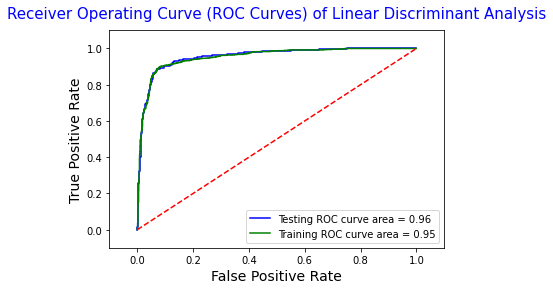

In [69]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Linear Discriminant Analysis', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [70]:
#prediction
y_pred = lda.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


      Spam  Ham
Spam   767   37
Ham    120  457


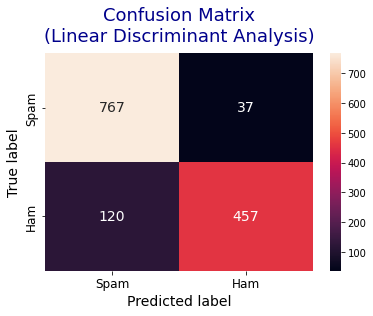

In [71]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Linear Discriminant Analysis)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [72]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Linear Discriminant Analysis : \n')
print(report)

Classification Report of Linear Discriminant Analysis : 

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       804
           1       0.93      0.79      0.85       577

    accuracy                           0.89      1381
   macro avg       0.89      0.87      0.88      1381
weighted avg       0.89      0.89      0.88      1381



# Quadratic Discriminant Analysis

In [73]:
#build model
qda = QuadraticDiscriminantAnalysis()
%time qda.fit(X_train, y_train)
print('Accuracy Score :', qda.score(X_test, y_test))

Wall time: 32 ms
Accuracy Score : 0.8160753077480087


c:\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [74]:
#calculate prediction probability
prob_train = np.squeeze(qda.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(qda.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [1.00000000e+000 1.00000000e+000 1.00000000e+000 ... 1.55533083e-241
 1.80905466e-015 1.00000000e+000]

Probability of Testing Set : 
 [1.00000000e+00 5.68177542e-01 7.63226842e-01 ... 1.00000000e+00
 1.00000000e+00 6.89782910e-43]


In [75]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.8782280107262648
Training of Area Under the Curve (AUC) : 0.875554802497651


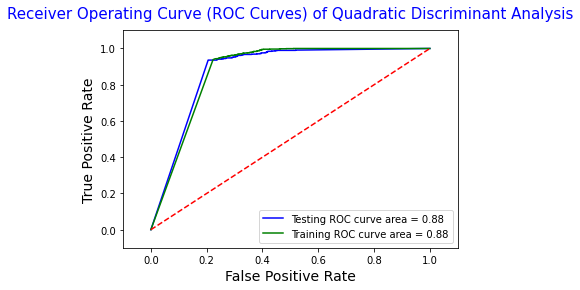

In [76]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Quadratic Discriminant Analysis', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [77]:
#prediction
y_pred = qda.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 0]


      Spam  Ham
Spam   580  224
Ham     30  547


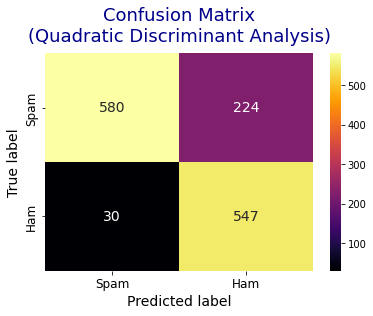

In [78]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'inferno')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Quadratic Discriminant Analysis)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [79]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Quadratic Discriminant Analysis : \n')
print(report)

Classification Report of Quadratic Discriminant Analysis : 

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       804
           1       0.71      0.95      0.81       577

    accuracy                           0.82      1381
   macro avg       0.83      0.83      0.82      1381
weighted avg       0.85      0.82      0.82      1381



# Comparison of Machine Learning Algorithm

In [80]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    LinearSVC(),
    DecisionTreeClassifier(criterion = 'gini', max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [81]:
#report models
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = metrics.log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 78.2042%


c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Log Loss: 7.528076787356395


LinearSVC
****Results****
Accuracy: 77.7697%
Log Loss: 7.678232176165554


DecisionTreeClassifier
****Results****
Accuracy: 86.1694%
Log Loss: 4.776918669202633




c:\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp/ipykernel_11148/748696947.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_11148/748696947.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier
****Results****
Accuracy: 95.5829%
Log Loss: 1.5256212536082674


AdaBoostClassifier
****Results****
Accuracy: 93.3382%
Log Loss: 2.300939184240913


GaussianNB
****Results****
Accuracy: 82.4765%
Log Loss: 6.052536858959876


LinearDiscriminantAnalysis
****Results****
Accuracy: 88.6314%
Log Loss: 3.926587602538664


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 81.6075%
Log Loss: 6.352663514939667




C:\Users\ASUS\AppData\Local\Temp/ipykernel_11148/748696947.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_11148/748696947.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_11148/748696947.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
c:\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ASUS\AppData\Local\Temp/ipykernel_11148/748696947.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

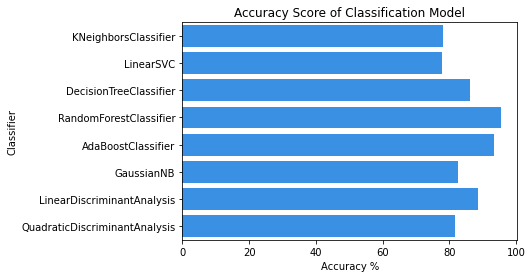

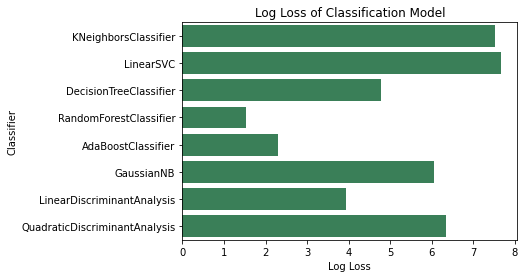

In [82]:
#visualize accuracy models
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = 'dodgerblue')
plt.xlabel('Accuracy %')
plt.title('Accuracy Score of Classification Model')
plt.show()

#visualize log loss models
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = 'seagreen')
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

# Deployment

In [83]:
#deploying the model
rf.fit(X, y)
pickle.dump(rf, open('Random_Forest.pkl', 'wb'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


**Spam Label Classification :**
- 0 -> Ham
- 1 -> Spam

**Conclusion :**
- Random Forest Classifier is very suitable model to predict spam classification message on E-mail
- Accuracy Score on 96%
- Testing Set of ROC Curves Area on 99%
- Training Set of ROC Curves Area on 100%
- Ham labels with precision on 95%, recall on 97% and f1-score on 96%
- Spam labels with precision on 96%, recall on 93% and f1-score on 95%
- Ham labels have 804 samples more than Spam labels have 577 samples